# __Práctica 1 - Parte 2__

## __Preparación de los datos__
Descripción y preparación de los datos.

### __Variables de entrada__
En esta sección se explicarán qué representan las variables del dataset con una descripción, el tipo de variable (e.g.,categórica, numerica... etc.) y los valores posibles que estas pueden tomar en caso de ser categóricas.


#### **Datos de los clientes del banco**
> **Descripción:** Las variables que caen bajo este subconjunto son aquellas que están relacionadas con los datos del clientes del banco. Estas variables evalúan distintos factores del cliente, como su empleo, background educativo, préstamos... etc.


- **age** (Tipo: numérico): Edad del cliente.


- **job** (Tipo: categórico): Representa el tipo de trabajo que realiza el cliente. (Valores posibles: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self employed","services","student","technician","unemployed","unknown")


- **marital** (Tipo: categórico): Estado marital de cliente. (Valores posibles: "divorced","married","single","unknown"; note: "divorced" significa divorciado/a o viudo/a)


- **education** (Tipo: categórico): Nivel de educación del cliente. (Valores posibles: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")


- **default** (Tipo: categórico): Variable que indica si el cliente ha tenido impagos. (Valores posibles: "no","yes","unknown")


- **housing** (Tipo: categórico): Variable que indica si el cliente tiene un préstamo hipotecario. (Valores posibles: "no","yes","unknown")


- **loan** (Tipo: categórico): Variable que indica si el cliente tiene un crédito a título personal. (Valores posibles: "no","yes","unknown")



#### **Información relacionada con el último contacto en campaña**
> **Descripción:** La información en este subconjunto representa, para la campaña actual de captación de clientes del banco, distintas métricas sobre los clientes del banco. Esto es, veces que han sido llamados, si el contacto ha sido por telefono o por móvil... etc


- **contact** (Tipo: categórico): Método de comunicación con el cliente (Valores posibles: "cellular","telephone") 


- **month** (Tipo: categórico): Mes donde se estableció el último contacto con el cliente. (Valores posibles: "jan", "feb", "mar", ..., "nov", "dec")


- **day_of_week** (Tipo: categórico): Día de la semana donde se estableción el último contacto con el cliente (Valores posibles: "mon","tue","wed","thu","fri")


- **duration** (Tipo: numérico): Duración del último contacto que se tuvo con el cliente, en segundos. **Nota importante**: Este atributo afecta directamente a la clase que se está intentando predecir (e.g., if duration=0 then y="no"), siendo "y" el output a predecir. Esto quiere decir que, en un principio, este atributo es redundante, ya que, si todavía no se ha hecho una llamada al usuario una vez es cliente, la duración es 0, lo cual no es relevante. Este atributo por tanto, no debe ser considerado en caso de querer realizar un modelo predictvo.



#### **Otros atributos**
> **Descripción:** Otros atributos referentes a los clientes, como campañas del banco para la captación del cliente, días desde el último contacto con el cliente, resultados de la captación de clientes... etc.


- **campaign** (Tipo: numérico): Número de veces que se ha contactado al cliente en la campaña, incluído el último contacto. 


- **pdays** (Tipo: numérico): número de días que han pasado desde la última vez que se contacto al cliente en campaña. (numeric; - **Nota:** Si el valor es 999, significa que el cliente no ha sido contactado previamente)


- **previous** (Tipo: numérico): Cantidad de contactos realizados a dicho cliente antes de que empezase la campaña. 


- **poutcome** (Tipo: categórico): Resultado del marketing de la campaña. Basicamente, si se ha tenido éxito a la hora de captar al cliente en la campaña. (Valores posibles: "failure","nonexistent","success")



#### **Atributos socio-económicos**

> **Descripción**: Atributos no relevantes a los clientes ***per se***, si no mas bien a lo que rodea a dichos clientes, como pueden ser métricas o índices económicos.


- **emp.var.rate** (Tipo: numérico): Ratio de variación del empleo - ***Indicador cuatrimestral***. Indica la variación de la cantidad de personas están siendo despedidas y contratas en un intervalo de tiempo. Esta es una métrica que indica cómo de estables son los trabajos en el momento de análisis.


- **cons.price.idx (IPC)** (Tipo: numérico): Índices de precios al consumidor - ***monthly indicator***. Indice económico que evalúa el precio de un conjunto de bienes de primera necesidad(e.g., alimentos del hogar) estudiando si estos son mayor o menormente accesibles en base a las encuestas de los gastos de los hogares (donde a ***grosso modo*** se evalúa si vivir sale más caro o mas barato). Este valor es representado por un porcentaje, donde si el valor sale positivo, significa que ha habido un aumento de los precios y negativo, en caso de que hayan bajado.


- **cons.conf.idx** (Tipo: numérico): Índice de confianza del consumidor - ***monthly indicator***. Representa la confianza de crecimiento ecónomico que deposita el consumidor, esto se traduce en lo siguiente: si el consumidor esta consumiendo mas, significa un mayor consumo, lo que indica un crecimiento económico.


- **euribor3m**  (Tipo: numérico): Euribor a 3 meses rate - ***daily indicator***. Muestra el euribor a 3 meses. El Euribor es un ratio que mide la media de los intereses de los préstamos (excluyendo el 15% mas alto y bajo) que los bancos europeos se ceden entre sí. A mayor euribor, mayores intereses y por lo tanto, pedir prestamos sale mas caro, lo mismo ocurirrá de manera contraria.


- **nr.employed** (Tipo: numérico): número de empleados - ***quarterly indicator***.


### __Variable de salida (target):__
- **y** (Tipo: binario): ¿Se ha hecho el cliente un depósito a plazos en el banco? (Valores posibles: "yes","no")

#### Importación de las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Cargamos el dataset

In [2]:
filename = 'bank-additional-full.csv'
missing_values = ['unknown']
df = pd.read_csv(filename, delimiter = ';', na_values = missing_values )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Observamos el tipo de variables que están presentes en el dataset:

In [3]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


##### Análisis de los missing values

In [4]:
# Identifiquemos los missing values
def df_na_stats(df):
        df_nas = pd.isna(df)
        for col in df_nas.columns:
                nas = sum(df_nas[col])
                print(f'{col}:{nas} NA : {100*nas/len(df_nas[col])}%')

        withNa = sum(df_nas.apply(any, axis=1))
        print(f'El número total de registros con valor NA es: {withNa}, {(withNa/(df_nas.shape[0]*df_nas.shape[1]))*100}%')

df_na_stats(df)

age:0 NA : 0.0%
job:330 NA : 0.8012042342429834%
marital:80 NA : 0.1942313295134505%
education:1731 NA : 4.202680392347285%
default:8597 NA : 20.872584247839175%
housing:990 NA : 2.40361270272895%
loan:990 NA : 2.40361270272895%
contact:0 NA : 0.0%
month:0 NA : 0.0%
day_of_week:0 NA : 0.0%
duration:0 NA : 0.0%
campaign:0 NA : 0.0%
pdays:0 NA : 0.0%
previous:0 NA : 0.0%
poutcome:0 NA : 0.0%
emp.var.rate:0 NA : 0.0%
cons.price.idx:0 NA : 0.0%
cons.conf.idx:0 NA : 0.0%
euribor3m:0 NA : 0.0%
nr.employed:0 NA : 0.0%
y:0 NA : 0.0%
El número total de registros con valor NA es: 10700, 1.2370685867820954%


Sobre las variables con mayor valor procentaje de missing values: Tendríamos __default__ (impagos), con un 20.87%, __education__ con un 4.2% y __housing__ y __loan__ con un 2.404% ambos.

Los missing values ocurren en su totalidad en variables que son categóricas. El porcentaje de missing values que nos preocupa es __default__ con un 20%, ya que un valor muy alto de desinformación. Ante esto, tendremos que evaluar como poder rellenar los valores faltantes sin que afecten a los datos que el dataset intenta representar.

In [5]:
# TODO: Código con la solución para los missing values del campo default.
df['default'] = df['default'].fillna(df['default'].mode()[0])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Para el resto de las variables con __missing values__, al ser porcentajes pequeños, se podrían hacer varios aproaches ante este problema:
 - Utilizar modelos para inducir el valor a partir del resto de variables.
 - Tratar la categoría "missing value" como otro valor posible de la variable categórica.
 - Usar, en el caso de las variables categóricas, la moda de una de ellas para rellenar los missing values.
 - Ignorar los registros donde esta variable no tiene valor). 
 
Por comodidad, haremos la media en el caso de las variables continuas y la moda en el de las categóricas.

In [6]:
# en este caso, como todas las variables que existen en el dataset con NAs son categóricas, utilizaremos la moda, para rellenar dichos missing values.
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df['loan'] = df['loan'].fillna(df['loan'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
# Llamamos de nuevo a la función df_na_stats, para sacar de nuevo los stats asociados a los NAs, donde vemos ya, el 0%
df_na_stats(df)

age:0 NA : 0.0%
job:0 NA : 0.0%
marital:0 NA : 0.0%
education:0 NA : 0.0%
default:0 NA : 0.0%
housing:0 NA : 0.0%
loan:0 NA : 0.0%
contact:0 NA : 0.0%
month:0 NA : 0.0%
day_of_week:0 NA : 0.0%
duration:0 NA : 0.0%
campaign:0 NA : 0.0%
pdays:0 NA : 0.0%
previous:0 NA : 0.0%
poutcome:0 NA : 0.0%
emp.var.rate:0 NA : 0.0%
cons.price.idx:0 NA : 0.0%
cons.conf.idx:0 NA : 0.0%
euribor3m:0 NA : 0.0%
nr.employed:0 NA : 0.0%
y:0 NA : 0.0%
El número total de registros con valor NA es: 0, 0.0%


## Variables numéricas

#### Correlación variables numéricas.

Veamos si existe algún tipo de correlación entre las variables numéricas de nuestro dataset.

In [8]:
correlation  = df.corr()
correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Aquí se puede observar que existen valores altos (cercanos a 1) dentro de la matriz de dispersión. Vamos a representarlos gráficamente para verlo con mayor claridad.

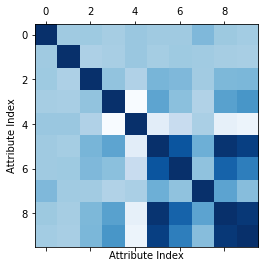

In [9]:
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()

Aquí se puede apreciar una correlación clara entre __emp.var.rate__ y __euribor3m__, y otra entre __euribor3m__ y __nr.employed__. También existe una correlación aparente entre __cons.price.idx__ y __emp.var.rate__.

Mostraremos los datos mediante la matriz de __scatter_plot__, en este caso las variables númericas son aquellas que serán representadas (de las categóricas nos encargaremos mas tarde).

<Figure size 432x288 with 0 Axes>

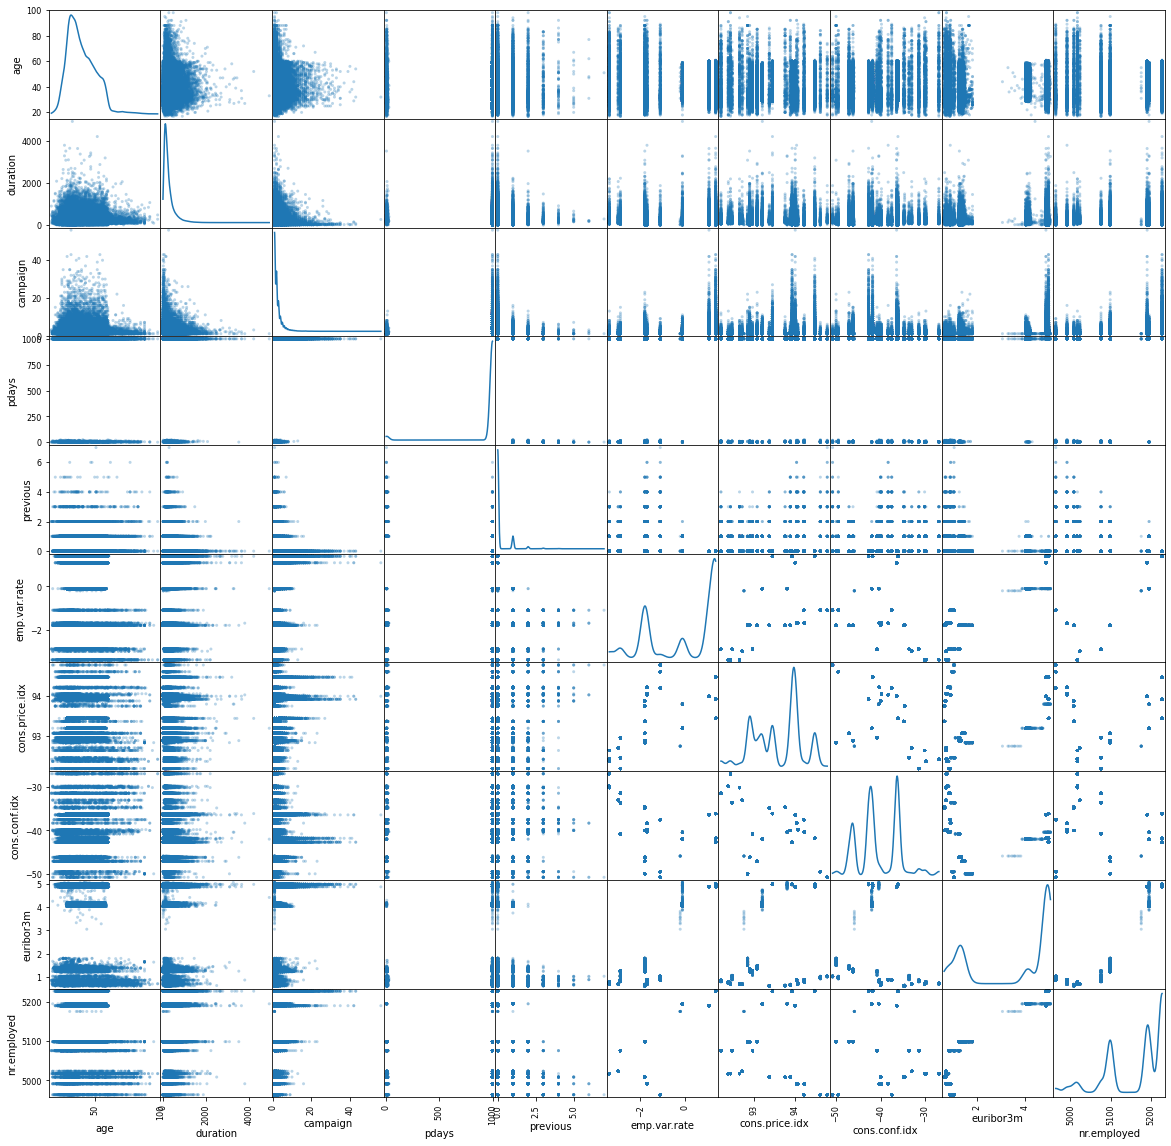

In [10]:
#### Scatter Matrix Plot

plt.figure()
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.3, figsize=(20, 20), diagonal='kde')
plt.show()

Viendo este gráfico de dispersión, vemos que los valores de muchas variables, pese a no ser categóricos, son discretos, ya que solo toman valores enteros. Esto hace que se vean, para cada celda, que representa el enfrentamiento de una variable frente a otra, distintos puntos agrupados a modo de estratos en ellas. Claro ejemplo de esto es, por ejemplo, la celda que enfrenta __previous__ frente a __campaign__ o __age__ frente a __nr.employed__.

Vemos que, en el dataset se aprecia, por ejemplo, que valores de las variables del dataset asociadas a atributos __socio-económicos__ (euribor, IPC... etc) están distribuidas en estratos también, y que no dependen de factores como la edad o la duración de las llamadas. Esto nos hace pensar que, los datos fueron recogidos en distintos intervalos temporales, ya que el valor del euribor es distinto para clientes con misma edad. Esto solo puede darse debido a que, en unas fechas, el euribor se ajustó para unos tipos de interes y en otras fechas para otro.

En los atributos asociados a los clientes y las campañas, vemos que existe una tendencia bajista entre la duración de las llamadas a los clientes (__duration__) y su edad (__age__). Ya que, como se puede observar en el gráfico, a partir de los 65-70 años, la duración de las llamadas desciende notablemente. Relacionado con esto, vemos que el número de contactos en campaña (atributo __campaign__) realizado con clientes según su edad, sigue la misma tendencia que duration, ya que, a partir de los 65-70 años, el número de contactos desciende de manera notable. 
En adición a esto, vemos que la duración de las llamadas suele ser mayor en los primeros contactos que se realizan sobre los clientes en campaña, y que, a medida que los clientes son contactados mas veces, la duración de las llamadas, desciende. Esto también se ve en el caso de los contactos previos a campaña (__previous__) frente a la duración. Las llamadas suelen durar menos, cuantas mas veces se ha contactado con un cliente antes de la campaña, lo que apoya nuestra teoría de que, a medida que se realizan mas llamadas a los clientes, estas suelen durar cada vez menos.

### Analisis variables categoricas (Falsos predictores)

Creamos un boxplot que nos diga como de correladas están las variables duration e 'y', la variable predictora.

<AxesSubplot:xlabel='y', ylabel='duration'>

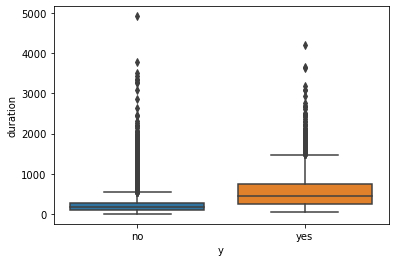

In [11]:
sns.boxplot(x='y', y='duration', data=df)

Vemos que los boxplots no nos dan mucha información, por lo que creamos una variable dummy sobre la clase predictora (__y__), para poder estudiar su __correlación__ con las distintas variables que existen en el dataset. Según la descripción del dataset, la variable __duration__ es un falso predictor, al estar muy correlado con __y__, comprobamos esto en el siguiente bloque de código.

In [12]:
df_y_dummie = pd.get_dummies(df, columns=['y'])

In [13]:
correlation_duration_y  = df_y_dummie.corr()
correlation_duration_y

# TODO: Solo sale una correlación del 40%... no entiendo porque en el txt dice que la variable 'y' es completamente dependendiente de duration, 
# si luego no correla.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_no,y_yes
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.030399,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.405274,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.066357,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,0.324914,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,-0.230181,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,0.298334,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,0.136211,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,-0.054878,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.307771,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,0.354678,-0.354678


Tal y como se indica dentro del fichero __bank-additional-names.txt__, junto con la explicación dada al principio del notebook, la variable duration es un falso predictor. Esto es debido a que, se tiene por supuesto que antes de la llamada, la duration=0 y la y=no, lo cual no aporta ninguna información al dataset, ya que una vez realizada la llamada, el valor duration deja de ser 0 y la 'y' ya se conoce (se ha captado a un cliente para que deje un depósito o no). Es por esto, que esta variable será quitada del dataset.

In [14]:
df_no_dur = df.drop(columns='duration')

#### Normalización y transformación de los datos

In [15]:
cat_cols = [column for column in df_no_dur.columns if df_no_dur[column].dtype == object]
num_cols = list(set(df_no_dur.columns)-set(cat_cols))

In [16]:
# En primer lugar, realicemos una tranformación sobre los datos categóricos (codificación),
cols = list(df_no_dur.columns)
df_factorized = df_no_dur.copy()

for i,col in enumerate(cols):
    if df_factorized.dtypes[col] == object:
        df_factorized.loc[:,col] = df_factorized.loc[:,col].factorize()[0]

df_no_dur = df_factorized.copy()
df_no_dur

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,0,0,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,0,1,5,4,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,5,0,1,0,1,5,4,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,0,1,5,4,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


Normalizaremos los datos que adoptan un conjunto de valores continuos en el espectro y que abarcan un amplio intervalo. En este caso, las variables seleccionadas serían __euribor3m__, __cons.conf.idx__, __nr.employed__ y __cons.price.idx__ ya que tienen valores dispares. Normalizarlos nos permitirá saber como de dispares son los valores con respecto a la media, dando una mayor visión de como de alejados o cercanos se encuentran los valores de la variable con respecto a los valores 'normales' (media).


In [17]:
# definimos la función minmax_norm, que se encargará, para una variable de entrada, retornar sus valores normalizados.

def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df_no_dur['euribor3m'] = minmax_norm(df_no_dur['euribor3m'])
df_no_dur['cons.conf.idx'] = minmax_norm(df_no_dur['cons.conf.idx'])
df_no_dur['nr.employed'] = minmax_norm(df_no_dur['nr.employed'])
df_no_dur['cons.price.idx'] = minmax_norm(df_no_dur['cons.price.idx'])

In [18]:
# Ya con todas las variables categóricas transformadas, determinemos si hubiese falsos predictores
# Para esto vamos a ver si alguna de los atributos numéricos tiene influye 
# decisivamente sobre la salida. De existir una fuerte correlación, habría que analizar
# si se tratase o no se un falso predictor.

# Para comprobarlo graficamente vamos a añadir a la matriz de correlación anterior la salida "y". 
df_pred = df_no_dur[['campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
correlation_pred  = df_pred.corr()
correlation_pred

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
campaign,1.000000,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
emp.var.rate,0.150754,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.127836,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,-0.013733,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.135133,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,0.144095,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,-0.066357,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


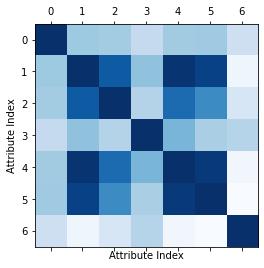

In [19]:
plt.figure()
plt.matshow(correlation_pred, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()
# Tal y como se observa en la matriz, no hay ninguna correlación fuerte entre las variables de entrada y de salida
# por lo que podemos concluir que no existen falsos predictores.

Aquí observamos que existe una correlación entre el __euribor3m__ y el __nr.employed__, y otra entre el __euribor3m__ y __emp.var.rate__ y entre __emp.var.rate__ y __nr.employed__.

In [20]:
# Por lo que eliminamos las variables emp.var.rate y nr.employed, ya que con euribor3m, tenemos una descripción de las otras dos variables, al estar 
# tan correladas
df_red = df_no_dur.drop(['emp.var.rate', 'nr.employed'], axis = 1)

# Actualizamos las variables numéricas
num_cols = list(set(num_cols) - set(['emp.var.rate', 'nr.employed']))
num_cols

['age',
 'previous',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'pdays',
 'euribor3m']

#### Análisis de los distintos estadísticos(__con outliers__)

In [21]:
#Los principales valores estadisticos, para cada variable
df_red.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.561013,0.504807,2.981669,0.000073,0.547878,0.151695,0.634748,2.250097,1.979581,2.567593,962.475454,0.172963,0.169904,0.535723,0.430854,0.677237,0.112654
std,10.42125,2.259017,0.688431,1.836569,0.008534,0.497708,0.358729,0.481507,2.429079,1.411514,2.770014,186.910907,0.494901,0.455754,0.225581,0.193648,0.393210,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,999.000000,0.000000,0.000000,0.340608,0.338912,0.160961,0.000000
50%,38.00000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,999.000000,0.000000,0.000000,0.603274,0.376569,0.957379,0.000000
75%,47.00000,4.000000,1.000000,5.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,999.000000,0.000000,0.000000,0.698753,0.602510,0.980957,0.000000
max,98.00000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,56.000000,999.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000


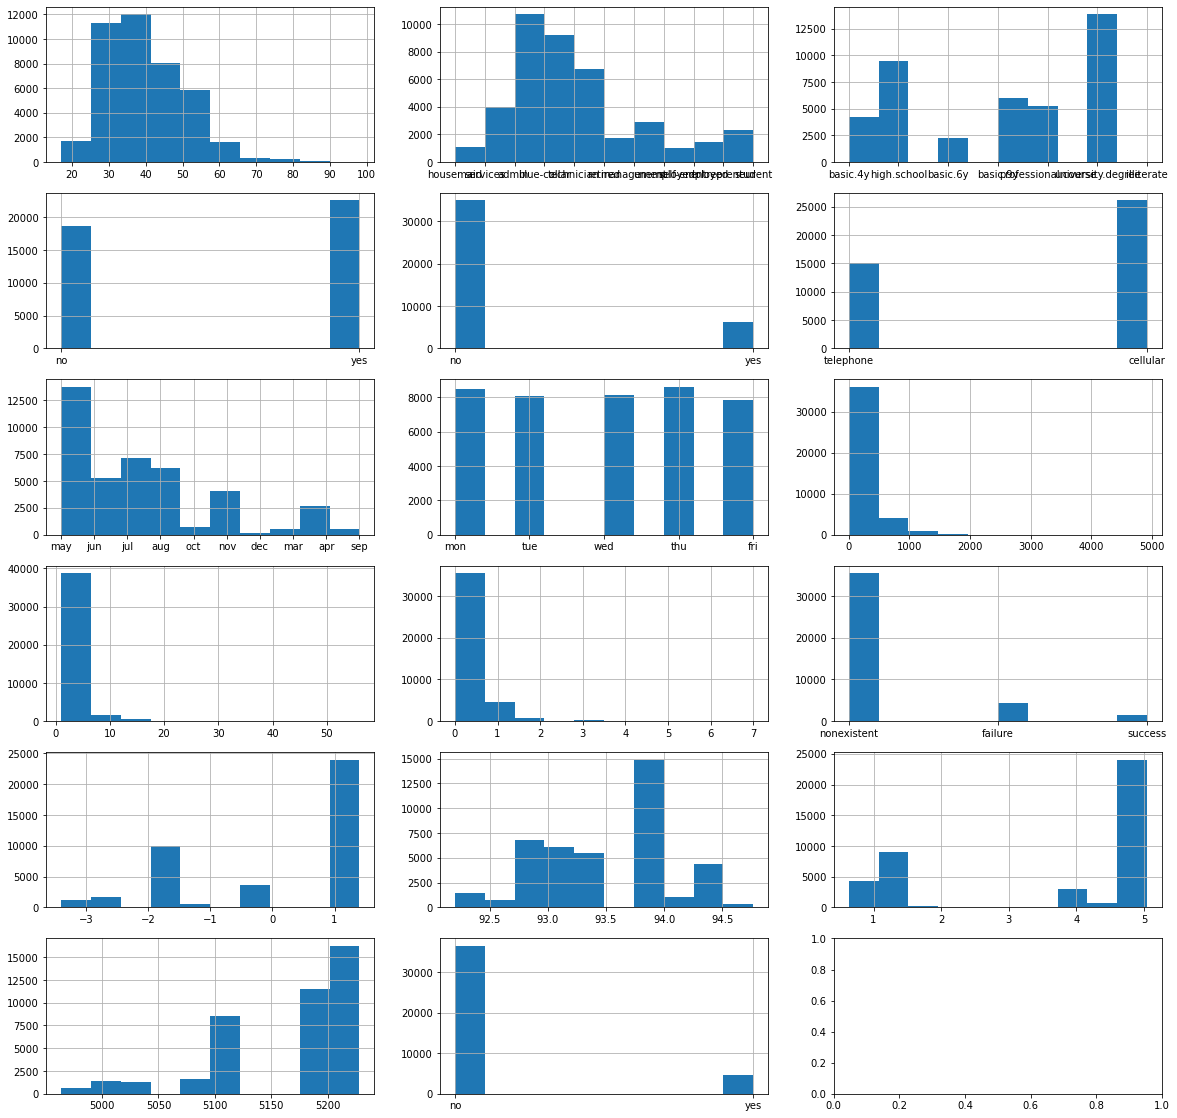

In [22]:
#Veamos los histogramas para mis variables, donde aparecerá una visión general de los valores tomados por las distintas variables
columns = [
    'age',
    'job',
    'education',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'euribor3m',
    'nr.employed',
    'y'
    
]

fig, axs = plt.subplots(6,3, figsize = (20,20))
for n, col in enumerate(columns):
    i,j = n//3, n%3
    df[col].hist(ax = axs[i,j])

#### __Detección de outliers__

Para este apartado vamos a calcular el número total de registros outliers para las variables numéricas. Para este caso, utilizamos el rango intercuartilico (IQR), el cual se encarga de ver la cantidad de valores que existen, desde el cuartil 25% y 75%, una unidad y media del IQR hacia la derecha (valores positivos) y hacia la izquierfa(valores negativos), para así determinar cuales son los valores 'outliers'.

In [23]:
cols = ['age',
    'cons.price.idx',
    'euribor3m',
]

Q1 = df_red[cols].quantile(0.25)
Q3 = df_red[cols].quantile(0.75)
IQR = Q3 - Q1

lower_lim = (Q1-1.5*IQR)
upper_lim = (Q3+1.5*IQR)

lower_lim_filter = df_red[cols]<lower_lim
upper_lim_filter = df_red[cols]>upper_lim

# records totales del dataframe
total_records = df.count()[0]
total_records

41188

In [24]:

# TODO: revisar shape[0], ya que este indica el número de filas del dataframe, no el total de outliers que existen en el dataframe. 
outliers_df = df_red[(lower_lim_filter|upper_lim_filter).any(axis=1)]
total_outliers = outliers_df.shape[0]
print(f'El número total de registros que tienen outliers en el dataframe es: {total_outliers}')

El número total de registros que tienen outliers en el dataframe es: 469


In [25]:
# Este es el dataframe sin outliers:
df_no_outliers = df_red[~(lower_lim_filter|upper_lim_filter).any(axis=1)]

El valor obtenido, es dado sobre todas las variables del dataset, es decir, dentro de todos los valores de todas las variables, desglosemoslo, viendo por cada variable, cuantos outliers se tienen.

In [26]:
def subtract_custom_value(x, custom_value):
    return abs(x - custom_value)

In [27]:
outlier_series = df_red[~(lower_lim_filter|upper_lim_filter)].filter(df_red[cols] == False).count()
print("Los outliers observados por campo, son los siguientes: \n")
outlier_series.apply(subtract_custom_value, args=(total_records,))


Los outliers observados por campo, son los siguientes: 



age               469
cons.price.idx      0
euribor3m           0
dtype: int64

In [28]:
# Sacamos de nuevo los estadísticos con los outliers eliminados
df_no_outliers.describe

<bound method NDFrame.describe of        age  job  marital  education  default  housing  loan  contact  month  \
0       56    0        0          0        0        0     0        0      0   
1       57    1        0          1        0        0     0        0      0   
2       37    1        0          1        0        1     0        0      0   
3       40    2        0          2        0        0     0        0      0   
4       56    1        0          1        0        0     1        0      0   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41181   37    2        0          5        0        1     0        1      5   
41182   29    7        1          0        0        1     0        1      5   
41184   46    3        0          4        0        0     0        1      5   
41185   56    5        0          5        0        1     0        1      5   
41186   44    4        0          4        0        0     0        1      5   

       day_of_wee

## __Reducción de la dimensionalidad__

### Segmentación del dataset entre test y validación

In [29]:
from sklearn.model_selection import train_test_split

# en x todas las variables de entrada de nuestro dataset, en y la variable output:
x = df_no_outliers[df_no_outliers.columns[:-1]]
y = df_no_outliers['y']

cat_cols = list(set(cat_cols) - set(['y']))

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) # especificamos random_state para tener resultados reproducibles.

Estudiar los siguientes casos de reducción de dimensionalidad:

1. __Aproximación con test estadísticos__.
2. __Información mutua__.
3. __Análisis Discriminante Lineal__. 
4. __Análisis Componentes Principales__.

### 1. Aproximación con tests estadísticos.

#### __Test Chi2__

En este caso cogeremos las dos variable con mejor score. Las mostraremos en un scatter plot y distinguiremos entre ellas en función de a la clase a la que pertenecen.


In [30]:
#############################################################################################################################################
##################################################### test chi2 ##################################################################
#############################################################################################################################################

from scipy.stats import mannwhitneyu, chi2_contingency

scores_chi2 = []
f_obs = 0.0
ddof = 1

for var in cat_cols:
    contingency_table = pd.crosstab(x_train[var], y_train, margins=True, margins_name="Total")
    c, p, dof, expected = chi2_contingency(contingency_table)
    scores_chi2.append(p)

scores_chi2 = np.array(scores_chi2)
inds = np.argsort(scores_chi2)[::-1] # indices de scores de mayor a menor

for i in inds:
    print(cat_cols[i], "\t score=", scores_chi2[i])

attr_top_scores = []
for i in list(inds[:2]):
    attr_top_scores.append(cat_cols[i])


loan 	 score= 0.9999994982175696
default 	 score= 0.9848933726562163
housing 	 score= 0.17104724511888744
day_of_week 	 score= 0.0966309806980276
marital 	 score= 2.246194979805495e-23
education 	 score= 3.2723931730745737e-28
job 	 score= 1.749945870244768e-105
contact 	 score= 3.7842713938290686e-127
month 	 score= 0.0
poutcome 	 score= 0.0


Podemos observar que los valores con un mayor score son: __loan__ y __default__

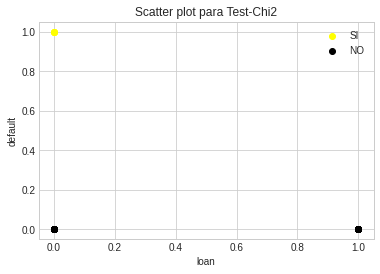

In [31]:
# Realizamos ahora el scatter plot
%matplotlib inline
import matplotlib.pyplot as plt

# obtenemos los índices donde las features tienen como valor para el target 'yes' (mismo para 'no')

plt.style.use('seaborn-whitegrid')

plt.scatter(x=df_no_outliers[df_no_outliers.y == 0][attr_top_scores[0]], y=df_no_outliers[df_no_outliers.y == 0][attr_top_scores[1]], color='yellow', marker="o")
plt.scatter(x=df_no_outliers[df_no_outliers.y == 1][attr_top_scores[0]], y=df_no_outliers[df_no_outliers.y == 1][attr_top_scores[1]], color='black', marker="o")
plt.xlabel(attr_top_scores[0])
plt.ylabel(attr_top_scores[1])
plt.title("Scatter plot para Test-Chi2")
plt.legend(['SI', 'NO'])
plt.show()


#### Test Mann-Whiteney asume que no hay diferencia entre las distribuciones de las muestras, por lo que se tienen dos casos:

* __Aceptar H0__: Las distribuciones de la muestra son las mismas.
* __Rechazar H0__: Las distribuciones de las muestras __NO__ no son las mismas.

In [32]:
#############################################################################################################################################
##################################################### test Mann-Whiteney U ##################################################################
#############################################################################################################################################

scores_t = []

# obtenemos los índices donde las features tienen como valor para el target 'yes' (mismo para 'no')
class_yes = y_train[y_train == 1]
class_no = y_train[y_train == 0]

# obtenemos los regustros del dataframe de las fetures que tienen las clases iguales a yes o no.
yes_X = x_train.iloc[class_yes]
no_X = x_train.iloc[class_no]

for var in num_cols:
    stats, p = mannwhitneyu(np.array(yes_X[var]), np.array(no_X[var]))
    scores_t.append(p)
    
alpha = 0.05

scores_t = np.array(scores_t)
inds = np.argsort(scores_t)[::-1] # indices de scores de mayor a menor

final_features = []
for i in inds:
    print(num_cols[i], "\t score=", scores_t[i])

attr_top_scores = []
for i in list(inds[:2]):
    attr_top_scores.append(num_cols[i])

'''
for s in scores_t:
    if s > alpha:    # no se puede rechazar la hipotesis.
        pass
    else: 
        final_features.append(s)'''

pdays 	 score= 1.0
previous 	 score= 1.0
euribor3m 	 score= 0.0
cons.price.idx 	 score= 0.0
cons.conf.idx 	 score= 0.0
campaign 	 score= 0.0
age 	 score= 0.0


'\nfor s in scores_t:\n    if s > alpha:    # no se puede rechazar la hipotesis.\n        pass\n    else: \n        final_features.append(s)'

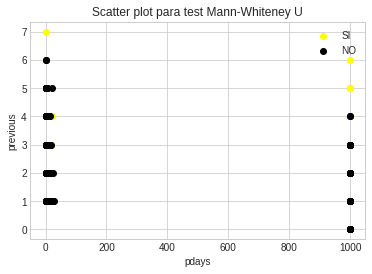

In [33]:
# Realizamos ahora el scatter plot
%matplotlib inline
import matplotlib.pyplot as plt

# Realizamos ahora el scatter plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.scatter(x=df_no_outliers[df_no_outliers.y == 0][attr_top_scores[0]], y=df_no_outliers[df_no_outliers.y == 0][attr_top_scores[1]], color='yellow', marker="o")
plt.scatter(x=df_no_outliers[df_no_outliers.y == 1][attr_top_scores[0]], y=df_no_outliers[df_no_outliers.y == 1][attr_top_scores[1]], color='black', marker="o")
plt.xlabel(attr_top_scores[0])
plt.ylabel(attr_top_scores[1])
plt.title("Scatter plot para test Mann-Whiteney U")
plt.legend(['SI', 'NO'])
plt.show()

#### __Prueba de indicadores de rendimiento del modelo__

In [34]:
# Por cada prueba se obtendrían indicadores del rendimiento del modelo predictivo resultante del entrenamiento al
# aplicarlo sobre el conjunto de test. Posibles indicadores serían: AUC-ROC, accuracy, sensitivity y specificity.


### 2. Información mutua

In [35]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score

mi_scores = []

for col in x_train.columns:
    if col in cat_cols:
        mi_s = mutual_info_score(x_train[col],
                                        y_train)
    else:
        mi_s = mutual_info_classif(x_train[[col]],
                                          y_train)[0]

    mi_scores.append(mi_s)

mi_scores = np.array(mi_scores)
inds = np.argsort(mi_scores)[::-1] # indices de scores de mayor a menor

final_features = []
for i in inds:
    print(x_train.columns[i], "\t score=", mi_scores[i])

attr_top_scores = []
for i in list(inds[:2]):
    attr_top_scores.append(x_train.columns[i])


euribor3m 	 score= 0.06984266195944544
cons.price.idx 	 score= 0.06504754482707797
cons.conf.idx 	 score= 0.06447726454073299
pdays 	 score= 0.03329954161697679
poutcome 	 score= 0.029344139836032866
month 	 score= 0.025034890540056982
previous 	 score= 0.01572638186422637
contact 	 score= 0.010745246184534527
job 	 score= 0.007723388765776329
campaign 	 score= 0.005871967984433901
age 	 score= 0.005830955641070723
education 	 score= 0.0027961751764572114
marital 	 score= 0.0018713616726105733
day_of_week 	 score= 0.0002644169663237883
housing 	 score= 0.00010510205851288479
default 	 score= 1.1411114992218889e-05
loan 	 score= 3.282776253610287e-08


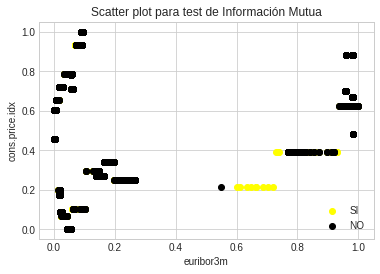

In [36]:
# Realizamos ahora el scatter plot
%matplotlib inline
import matplotlib.pyplot as plt

# Realizamos ahora el scatter plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.scatter(x=df_no_outliers[df_no_outliers.y == 0][attr_top_scores[0]], y=df_no_outliers[df_no_outliers.y == 0][attr_top_scores[1]], color='yellow', marker="o")
plt.scatter(x=df_no_outliers[df_no_outliers.y == 1][attr_top_scores[0]], y=df_no_outliers[df_no_outliers.y == 1][attr_top_scores[1]], color='black', marker="o")
plt.xlabel(attr_top_scores[0])
plt.ylabel(attr_top_scores[1])
plt.title("Scatter plot para test de Información Mutua")
plt.legend(['SI', 'NO'])
plt.show()

#### __Prueba de indicadores de rendimiento del modelo__

In [37]:
# Por cada prueba se obtendrían indicadores del rendimiento del modelo predictivo resultante del entrenamiento al
# aplicarlo sobre el conjunto de test. Posibles indicadores serían: AUC-ROC, accuracy, sensitivity y specificity.


### 3. Analisis Discriminante Lineal

In [38]:
#Cargamos la libreria que nos permita aplicar de forma más directa el método LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [39]:
# Cargamos el dataframe con los valores númericos. Con excepción del atributo y 
# que al ser binario hemos escrito 'yes' como 1 y 'no' como 0.
df_lda = df[['age','duration','duration','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
df_lda['y'] = df_lda['y'].replace(['no','yes'],[0,1])

/tmp/ipykernel_6504/3371950451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lda['y'] = df_lda['y'].replace(['no','yes'],[0,1])


In [40]:
# Definimos el vector de clasificación de conjuntos de datos.
#Este viene dado por el valor de y.
c1 = df_lda["y"].values
#Definimos los datos sobre los que vamos a aplicar LDA.
x1 = df_lda.drop("y", 1).values
#Gracias al constructor de LDA hallamos los valores de proyección y 
#para los datos de nuestro problema.
lda = LDA()
lda.fit(x1, c1)
y = lda.transform(x1)
#Normalizamos el vector de proyección
y_sum = sum(y**2)
y_norm = y/np.sqrt(y_sum)
print(f'El número de vectores tras la proyección es: {y_norm.shape[1]}')

El número de vectores tras la proyección es: 1


/tmp/ipykernel_6504/2479767021.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x1 = df_lda.drop("y", 1).values


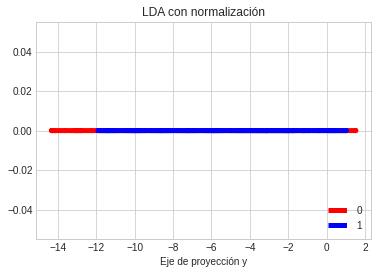

In [41]:
#Procedemos a la representación gráfica
# Dividimos en los 2 tipos para ponerles diferentes colores
lda_0 = y[c1 == 0]
lda_1 = y[c1 == 1]
#Definimos los datos a representar en la gráfica
y_value = 0
y_0 = np.zeros_like(lda_0[:,0]) + y_value
y_1 = np.zeros_like(lda_1[:,0]) + y_value
#Graficamos los puntos
plt.plot(lda_0[:,0], y_0, ls='dashed', c='red', lw=5, label=0)
plt.plot(lda_1[:,0], y_1, ls='dashed', c='blue', lw=5, label=1)
plt.title("LDA con normalización")
plt.xlabel("Eje de proyección y")
plt.legend( loc="lower right")
plt.grid(True)
plt.show()

In [42]:
#El vector de proyección
w_lda = lda.coef_[0]
w_norm = w_lda / np.sqrt(sum(w_lda**2))
print(f'El vector de proyección normalizado es: \n {w_norm}')

El vector de proyección normalizado es: 
 [ 0.00458635  0.00333197  0.00333197 -0.00531869 -0.42366476 -0.49457818
  0.75269957  0.081759   -0.04984385 -0.01017231]


Text(0, 0.5, 'Frecuencia')

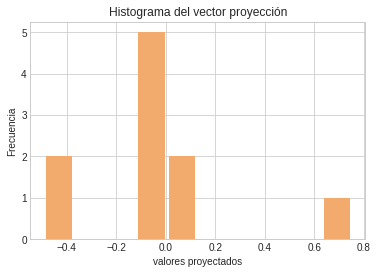

In [43]:
#Histograma de los datos del vector w,
plt.hist(x=w_norm, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma del vector proyección')
plt.xlabel('valores proyectados')
plt.ylabel('Frecuencia')

#### __Prueba de indicadores de rendimiento del modelo__

In [44]:
# Por cada prueba se obtendrían indicadores del rendimiento del modelo predictivo resultante del entrenamiento al
# aplicarlo sobre el conjunto de test. Posibles indicadores serían: AUC-ROC, accuracy, sensitivity y specificity.


### 4. Análisis Componentes Principales

In [45]:
#Importamos la libreria de sklearn para trabajar más facilmente con el método PCA
from sklearn.decomposition import PCA

In [46]:
#Vamos a normalizar los datos, dado que el método PCA es sensible a la escala
from sklearn import preprocessing
df_pca = df[['age','duration','duration','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
data_X = df_pca.drop("y", 1)
X_scaled = preprocessing.scale(data_X)

/tmp/ipykernel_6504/728272556.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_X = df_pca.drop("y", 1)


In [47]:
#Hacemos un llamamiento al método para reducir el nº de atributos del dataset original
pca = PCA()
pca.fit(X_scaled)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

In [48]:
#Abordaremos el problema en primer lugar con la matriz de cobarianza
#Obtención de la matriz de covarianza
cov = pca.get_covariance()
#Obtención de los vectores propios de la matriz de covarianza
autovalori, autovettori = np.linalg.eig(cov)
autovalor = autovalori.tolist()
autovector =autovettori.tolist()

#Mostremos en un dataframe ordenados los autovalores y sus componentes principales
list_autovalor = [[] for x in autovalor]
list_autovector = [[] for x in autovalor]
for j in range(len(autovalor)):
    list_autovalor[j].append(autovalor[j])
    list_autovector[j].append(autovector[j])

df_autovalor = pd.DataFrame(list_autovalor, columns = ['autovalor'])
df_autovector = pd.DataFrame(list_autovector, columns = ['autovector'])
df_resultado = pd.concat([df_autovalor, df_autovector], axis=1)
df_ordenado = df_resultado.sort_values('autovalor', ascending = False)
df_ordenado
#Para el espacio proyectado tomamos como criterio tomar aquellos autovalores 
#que sean mayores que uno.
df_filter = df_ordenado[df_ordenado['autovalor'] > 1]
df_filter

,autovalor,autovector
0,3.869335,"[-0.00169424765228269, 0.0022318451017166794, ..."
1,1.999745,"[-0.0359306193336783, 0.7042319499099423, 0.04..."
2,1.354016,"[-0.03593061933367834, 0.7042319499099432, 0.0..."
3,1.066909,"[0.22948321982034076, -0.04326315437526828, 0...."


In [49]:
#Abordamos el problema directamente con los métodos de PCA
X_pca = pd.DataFrame(pca.fit_transform(data_X))
X_pca

,0,1,2,3,4,5,6,7,8,9
0,2.372268,-39.997962,-17.819826,16.305915,2.924017,0.658416,-0.062510,0.028970,0.104839,-2.334116e-14
1,-155.923514,-34.533578,-17.039225,17.290386,2.839292,0.669585,-0.066726,0.029208,0.105649,2.003223e-12
2,-47.095028,-38.327461,-17.586075,-2.651969,4.243004,0.671247,-0.054306,0.035010,0.108376,1.199042e-15
3,-153.096684,-34.663797,-17.062122,0.331965,4.023917,0.677599,-0.058278,0.034449,0.108522,4.012123e-15
4,67.386605,-42.241473,-18.140214,16.311294,2.930201,0.653630,-0.060981,0.028745,0.104437,2.008579e-16
...,...,...,...,...,...,...,...,...,...,...
41183,107.924185,-6.750811,206.228623,32.257546,-10.101457,4.685855,-0.701835,-0.166545,0.487275,8.867116e-16
41184,177.178776,-9.192533,205.873099,5.328941,-8.213833,4.693815,-0.686895,-0.158444,0.491437,-6.490024e-16
41185,-97.012191,0.288451,207.229574,15.281936,-8.936593,4.709162,-0.698273,-0.160585,0.491433,-2.632813e-15
41186,260.566743,-12.073924,205.461112,3.340705,-8.066566,4.688644,-0.683947,-0.158114,0.491261,1.750338e-15


In [50]:
#Selección de los vectores en función de la suma de varianza explicada
my_pca = pca.explained_variance_
pca_logic = my_pca > 80
X_pca.loc[:, pca_logic ]

,0,1,2,3
0,2.372268,-39.997962,-17.819826,16.305915
1,-155.923514,-34.533578,-17.039225,17.290386
2,-47.095028,-38.327461,-17.586075,-2.651969
3,-153.096684,-34.663797,-17.062122,0.331965
4,67.386605,-42.241473,-18.140214,16.311294
...,...,...,...,...
41183,107.924185,-6.750811,206.228623,32.257546
41184,177.178776,-9.192533,205.873099,5.328941
41185,-97.012191,0.288451,207.229574,15.281936
41186,260.566743,-12.073924,205.461112,3.340705


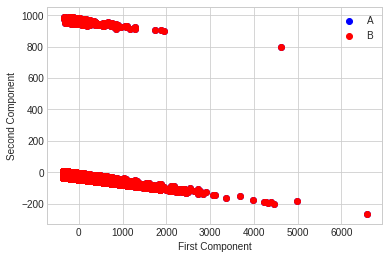

In [51]:
#Representación Scatter plot
PCA_0 = X_pca[c1 == 0]
PCA_1 = X_pca[c1 == 1]

#Plot
plt.scatter(x = PCA_0[0], y = PCA_0[1], c="blue")
plt.scatter(x = PCA_0[0], y = PCA_0[1], c="red")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.legend(["A","B"])
plt.show()

#### __Prueba de indicadores de rendimiento del modelo__

In [52]:
# Por cada prueba se obtendrían indicadores del rendimiento del modelo predictivo resultante del entrenamiento al
# aplicarlo sobre el conjunto de test. Posibles indicadores serían: AUC-ROC, accuracy, sensitivity y specificity.
